In [1]:
# layer: tiny HTM layer

from numpy import array

    # minicolumn 0 (Mary)

K00 = array([[0,1,2,3,4],[5,6,7,8,9]])
K10 = array([[0,1,2,3,4],[5,6,7,8,9]])
P00 = array([[0,0,0,0,0],[0,0,0,0,0]])
P10 = array([[0,0,0,0,0],[0,0,0,0,0]])
g0 = [0,1]

    # minicolumn 1 (John)

K01 = array([[0,1,2,3,4],[5,6,7,8,9]])
K11 = array([[0,1,2,3,4],[5,6,7,8,9]])
P01 = array([[0,0,0,0,0],[0,0,0,0,0]])
P11 = array([[0,0,0,0,0],[0,0,0,0,0]])
g1 = [2,3]

    # minicolumn 2 (likes)

K02 = array([[0,1,2,3,4],[5,6,7,8,9]])
K12 = array([[0,1,2,3,4],[5,6,7,8,9]])
P02 = array([[0,0,0,0,0],[0,0,0,0,0]])
P12 = array([[0,0,0,0,0],[0,0,0,0,0]])
g2 = [4,5]

    # minicolumn 3 (to)

K03 = array([[0,1,2,3,4],[5,6,7,8,9]])
K13 = array([[0,1,2,3,4],[5,6,7,8,9]])
P03 = array([[0,0,0,0,0],[0,0,0,0,0]])
P13 = array([[0,0,0,0,0],[0,0,0,0,0]])
g3 = [6,7]

    # minicolumn 4 (sing)

K04 = array([[0,1,2,3,4],[5,6,7,8,9]])
K14 = array([[0,1,2,3,4],[5,6,7,8,9]])
P04 = array([[0,0,0,0,0],[0,0,0,0,0]])
P14 = array([[0,0,0,0,0],[0,0,0,0,0]])
g4 = [8,9]

    # minicolumn 5 (dance)

K05 = array([[0,1,2,3,4],[5,6,7,8,9]])
K15 = array([[0,1,2,3,4],[5,6,7,8,9]])
P05 = array([[0,0,0,0,0],[0,0,0,0,0]])
P15 = array([[0,0,0,0,0],[0,0,0,0,0]])
g5 = [10,11]

    # minicolumn 6 (X)

K06 = array([[0,1,2,3,4],[5,6,7,8,9]])
K16 = array([[0,1,2,3,4],[5,6,7,8,9]])
P06 = array([[0,0,0,0,0],[0,0,0,0,0]])
P16 = array([[0,0,0,0,0],[0,0,0,0,0]])
g6 = [12,13]

    # minicolumn 7 (Y)

K07 = array([[0,1,2,3,4],[5,6,7,8,9]])
K17 = array([[0,1,2,3,4],[5,6,7,8,9]])
P07 = array([[0,0,0,0,0],[0,0,0,0,0]])
P17 = array([[0,0,0,0,0],[0,0,0,0,0]])
g7 = [14,15]

    # build super matrices

K = array([[K00,K01,K02,K03,K04,K05,K06,K07],
           [K10,K11,K12,K13,K14,K15,K16,K17]])
P = array([[P00,P01,P02,P03,P04,P05,P06,P07],
           [P10,P11,P12,P13,P14,P15,P16,P17]])
G = array([g0,g1,g2,g3,g4,g5,g6,g7])

print("K:",K.shape,"P:",P.shape,"G:",G.shape)

K: (2, 8, 2, 5) P: (2, 8, 2, 5) G: (8, 2)


In [2]:
from carabao.neuron import Cell,toy
from numpy import array,zeros

class Layer:
    def __init__(self,mon,G,K,P):
        self.mon = mon
        m,n,d,s = K.shape
        cells = []

           # build up FORTRAN order, so row index (i) must run faster
        
        for j in range(0,n):       # FORTRAN  order: column (j) index runs slower
            for i in range(0,m):   # and row index (i) runs faster
                k = j*m + i
                cell = Cell(mon,k,G[j],K[i,j],P[i,j])
                cells.append(cell)
        self.cells = array([cells]).reshape(m,n,order='F')

    def plot(self):
        cells = self.cells
        for i in range(0,cells.shape[0]):
            for j in range(0,cells.shape[1]):
                cells[i,j].plot(i,j)



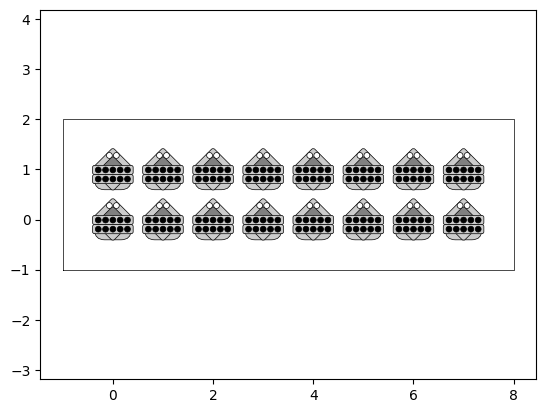

In [3]:
from carabao.screen import Monitor

mon = Monitor(K.shape[0],K.shape[1])
lay = Layer(mon,G,K,P)
cells = lay.cells
(cells[0,0].k, cells[1,0].k, cells[0,1].k, cells[1,1].k, cells[0,2].k, cells[1,2].k)
lay.plot()